In [8]:
import cv2

import deepSI
from deepSI.systems.System import System, System_Deriv, System_data
import numpy as np
from gym.spaces import Box

from deepSI.systems import double_well_video_system

import os
from PIL import Image
from matplotlib import pyplot as plt
sys = double_well_video_system()
train = sys.get_train_data()
test = sys.get_test_data()
exp = deepSI.System_data(u=2*np.sin(np.arange(0,100,sys.dt)))




# exp.plot(show=True)

sin_out = sys.apply_experiment(exp)


def to_vid(sys_data,video_name = 'droplets-video.mp4'):

    nx,ny = sys_data.y.shape[1],sys_data.y.shape[2] #resolution of simulation
    nx_out,ny_out = nx*10,ny*10 #resolution of video produced
    height, width = nx_out, ny_out

    # height, width = 20, 100
    video = cv2.VideoWriter(video_name, 0, 60, (width,height))
    # video.write(to_img(D))
    # to_img = lambda x: (x.copy()[:,:,None]*255*np.ones((1,1,3))).astype(np.uint8)
    resize = lambda x: np.array(Image.fromarray(x).resize((ny_out,nx_out)))
    to_img = lambda x: resize((np.clip(x,0,1).copy()[:,:,None]*255*np.ones((1,1,3))).astype(np.uint8))
    try: 
        for yi in sys_data.y:
            video.write(to_img(yi))
    finally:
        cv2.destroyAllWindows()
        video.release()

3
########## new best ###########
N_training_samples=8939, batch_size=256, N_batch_updates_per_epoch=34


########## new best ###########
Epoch:    1 Training loss:  0.3061 Validation loss = 0.07841, time Loss: 41.4%, back: 46.3%, val: 6.0%
########## new best ###########
Epoch:    2 Training loss:  0.2743 Validation loss = 0.07833, time Loss: 41.1%, back: 46.6%, val: 6.0%
########## new best ###########
Epoch:    3 Training loss:  0.2555 Validation loss = 0.05663, time Loss: 40.8%, back: 46.8%, val: 6.0%
########## new best ###########
Epoch:    4 Training loss:  0.1778 Validation loss = 0.04042, time Loss: 41.1%, back: 46.3%, val: 6.0%
########## new best ###########
Epoch:    5 Training loss:  0.1429 Validation loss = 0.03746, time Loss: 40.9%, back: 46.6%, val: 6.0%
########## new best ###########
Epoch:    6 Training loss:  0.1348 Validation loss = 0.03529, time Loss: 40.7%, back: 46.7%, val: 6.0%
########## new best ###########
Epoch:    7 Training loss:  0.1228 Validation loss = 0.03112, time Loss: 40.5%, back: 46.9%, val: 6.1%
########## new best ###########
Epoch:    8 Training lo

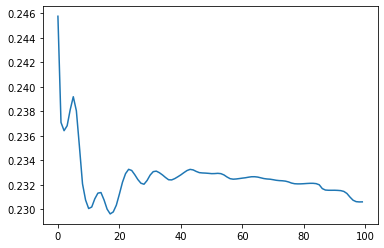

In [4]:
#System_encoder
# fit_sys = deepSI.fit_systems.System_IO_pytorch(na=4,nb=2)
to_vid(train,'train_real.mp4')




if True:
    fit_sys = deepSI.fit_systems.System_encoder(nx=5, na=12, nb=12)
    fit_sys.fit(train[1000:].flatten(),verbose=2,epochs=15*60, Loss_kwargs=dict(nf=50),sim_val=train[:1000].flatten(),sim_val_fun='RMS')
    fit_sys.save_system('encoder_visual_sys')
else:
    fit_sys = deepSI.load_system('encoder_visual_sys')


plt.plot(fit_sys.n_step_error(train.flatten()))
plt.show()

train_predict = fit_sys.apply_experiment(train.flatten())

# to_vid(train,'train_real.mp4')
to_vid(train_predict.reshape_as(train),'train_predict.mp4')

In [17]:
fit_sys.fit(train[1000:].flatten(),verbose=2,epochs=15*60, Loss_kwargs=dict(nf=50),sim_val=train.flatten(),sim_val_fun='RMS')

3
########## new best ###########
N_training_samples=8939, batch_size=256, N_batch_updates_per_epoch=34


Epoch:    1 Training loss: 0.01649 Validation loss = 0.008577, time Loss: 27.6%, back: 34.4%, val: 34.4%
Epoch:    2 Training loss: 0.01564 Validation loss = 0.006696, time Loss: 27.5%, back: 34.3%, val: 34.7%
########## new best ###########
Epoch:    3 Training loss: 0.01498 Validation loss = 0.005894, time Loss: 27.9%, back: 34.2%, val: 34.3%
########## new best ###########
Epoch:    4 Training loss: 0.01554 Validation loss = 0.005627, time Loss: 28.0%, back: 33.9%, val: 34.5%
Epoch:    5 Training loss: 0.01521 Validation loss = 0.006362, time Loss: 27.8%, back: 33.6%, val: 35.0%
Epoch:    6 Training loss: 0.01563 Validation loss = 0.005939, time Loss: 27.9%, back: 33.5%, val: 35.0%
Epoch:    7 Training loss: 0.01392 Validation loss = 0.005722, time Loss: 28.0%, back: 33.7%, val: 34.7%
Epoch:    8 Training loss: 0.01401 Validation loss = 0.006593, time Loss: 27.9%, back: 33.7%, val: 34.8%
Epoch:    9 Training loss: 0.01507 Validation loss = 0.007422, time Loss: 27.8%, back: 33.7%, va

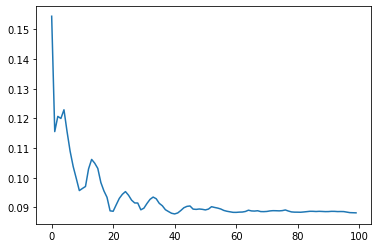

In [18]:
plt.plot(fit_sys.n_step_error(train.flatten()))
plt.show()

In [29]:
# sin_out

sin_out_predict = fit_sys.apply_experiment(sin_out.flatten())

# to_vid(train,'train_real.mp4')
to_vid(sin_out_predict.reshape_as(train),'sin_out_predict.mp4')
to_vid(sin_out,'sin_out_real.mp4')

In [20]:
train_predict = fit_sys.apply_experiment(train.flatten())

# to_vid(train,'train_real.mp4')
to_vid(train_predict.reshape_as(train),'train_predict.mp4')

In [22]:
test_predict = fit_sys.apply_experiment(test.flatten())

# to_vid(train,'train_real.mp4')
to_vid(test_predict.reshape_as(train),'test_predict.mp4')

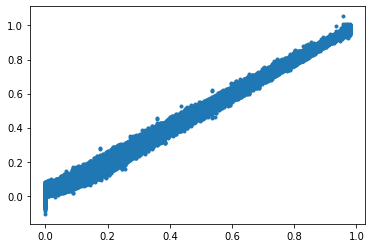

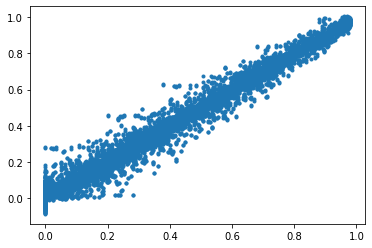

In [24]:
plt.plot(train.y.flat,train_predict.y.flat,'.')
plt.show()
plt.plot(test.y.flat,test_predict.y.flat,'.')
plt.show()

(array([  2.,   3.,  19., 965.,   7.,   1.,   0.,   1.,   0.,   2.]),
 array([-6.36268854e-17, -4.43012923e-17, -2.49756992e-17, -5.65010607e-18,
         1.36754870e-17,  3.30010802e-17,  5.23266733e-17,  7.16522664e-17,
         9.09778595e-17,  1.10303453e-16,  1.29629046e-16]),
 <a list of 10 Patch objects>)

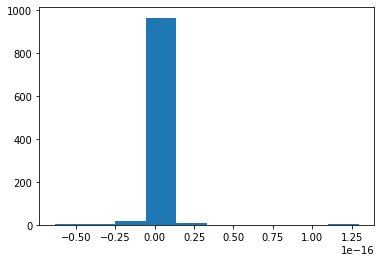

In [28]:
plt.hist(test_predict.y[:,0])

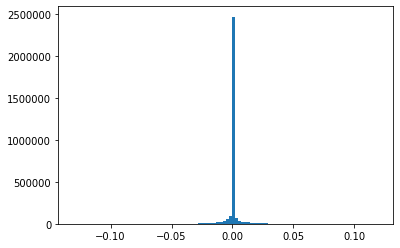

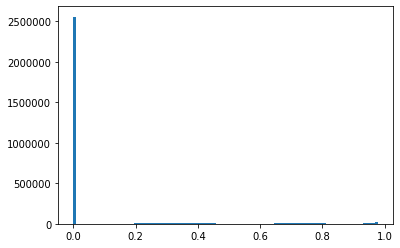

In [15]:
diff = (train_predict-train.flatten())
plt.hist(diff.y.flat,bins=100)
plt.show()
plt.hist(train.flatten().y.flat,bins=100)
plt.show()